In [50]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [51]:
credit=pd.read_csv(r'used\Credit Card on file-report-11-21-2024.csv')
credit.shape

(985, 3)

In [52]:
credit.head(5)

,ORG Name,Subcription Status,StripePlan Plan name
0,Bullet Solar,CANCELLED,Solar Per Proposal Monthly
1,Patriot Power,CANCELLED,Solar Per Proposal Monthly
2,SolarQuote,SUBSCRIBED,Solar Per Proposal Monthly
3,SolarQuote,SUBSCRIBED,Roof Per Proposal Monthly
4,SolarQuote,SUBSCRIBED,Battery Per Proposal Monthly


In [53]:
credit.isna().sum()

ORG Name                0
Subcription Status      0
StripePlan Plan name    0
dtype: int64

In [54]:
print(len(credit['StripePlan Plan name'].unique()))
print(len(credit['ORG Name'].unique()))
print(len(credit['Subcription Status'].unique()))

31
404
3


In [55]:
credit['Subcription Status'].value_counts()

Subcription Status
CANCELLED     385
SELECTED      381
SUBSCRIBED    219
Name: count, dtype: int64

Wats selected actually mean here?

In [56]:
offices=pd.read_csv(r'used\Number of offices-report-11-21-2024.csv')
offices.shape

(1528, 5)

In [57]:
offices.head(5)

,Parent ORG,Office Name,Name,State,City
0,live Orgnization,data uu,live Orgnization-data uu,NaN,NaN
1,Suntuity,NaN,Suntuity-Solar Quote,New Jersey,Holmdel
2,Suntuity,NaN,Suntuity-NJ Traditional North,New Jersey,Holmdel
3,Suntuity,NaN,Suntuity-NJ Traditional Hybrid,New Jersey,Holmdel
4,Suntuity,NaN,Suntuity-NJ Traditional South,New Jersey,Holmdel


In [58]:
offices.isna().sum()

Parent ORG       0
Office Name     73
Name             0
State          142
City           143
dtype: int64

In [59]:
print(len(offices['Office Name'].unique().tolist()))
print(len(offices['Parent ORG'].unique().tolist()))

1374
103


In [60]:


# Extract unique organizations from each DataFrame
credit_orgs = set(credit['ORG Name'])
offices_orgs = set(offices['Parent ORG'])

# Find common organizations
common_orgs = credit_orgs.intersection(offices_orgs)

# Count the number of common organizations
common_count = len(common_orgs)

print(f"Number of common organizations: {common_count}")
print(f"Common organizations: {common_orgs}")

Number of common organizations: 94
Common organizations: {'SunnyMac Solar', 'TriSMART Solar', 'Brightstar Marketing', 'Inty Power', 'test', 'Independent Solar', 'Test new project', 'Poly Energy', 'Green Light Solar', 'Energy Renovation Center', 'Kenkay Solar', 'Next Phase Electric', 'Skyline Solar LLC', 'Demand Construction', 'LivSmart', 'B&H Specialty Construction Services LLC', 'Scanifly Demo', 'One For All', 'Turn Solar', 'SOLRITE ELECTRIC LLC', 'live Orgnization', 'Vespa Solar', 'Solar Mite Solutions', 'Senergy Power', 'Revelation PWR', 'Pacific Coast Generation Inc', 'Vertexbeta Inc', 'Patriot Power', 'Harvest Solar Inc', 'US Solar', 'Billenium LLC', 'NewCo Energy LLC', 'Glyde Solar LLC', 'EnergyONE Renewables', 'Rack Solar', 'Solar Smart', 'eEquals', 'UES Solar', 'Solar AI', 'SubHub Trial Account', 'Solar Bros Electric LLC', 'Standard Energy Solutions', 'Integrity Solar and Home Solutions', 'Oto Pilot', 'Bryton Power LLC', 'SubcontractorHub Demo', 'Dawn to Dusk Solar', 'ESD Solar

In [61]:
# Filter DataFrames to include only common organizations
credit_filtered = credit[credit['ORG Name'].isin(common_orgs)]
offices_filtered = offices[offices['Parent ORG'].isin(common_orgs)]

# Merge the filtered DataFrames
credit_ofc = pd.merge(credit_filtered, offices_filtered, 
                     left_on='ORG Name', right_on='Parent ORG')

credit_ofc.shape

(4899, 8)

In [62]:
credit_ofc.isna().sum()

ORG Name                  0
Subcription Status        0
StripePlan Plan name      0
Parent ORG                0
Office Name             153
Name                      0
State                   343
City                    344
dtype: int64

In [63]:
office_counts = credit_ofc.groupby('Parent ORG')['Office Name'].nunique().reset_index(name='office_count')

print(type(office_counts))


<class 'pandas.core.frame.DataFrame'>


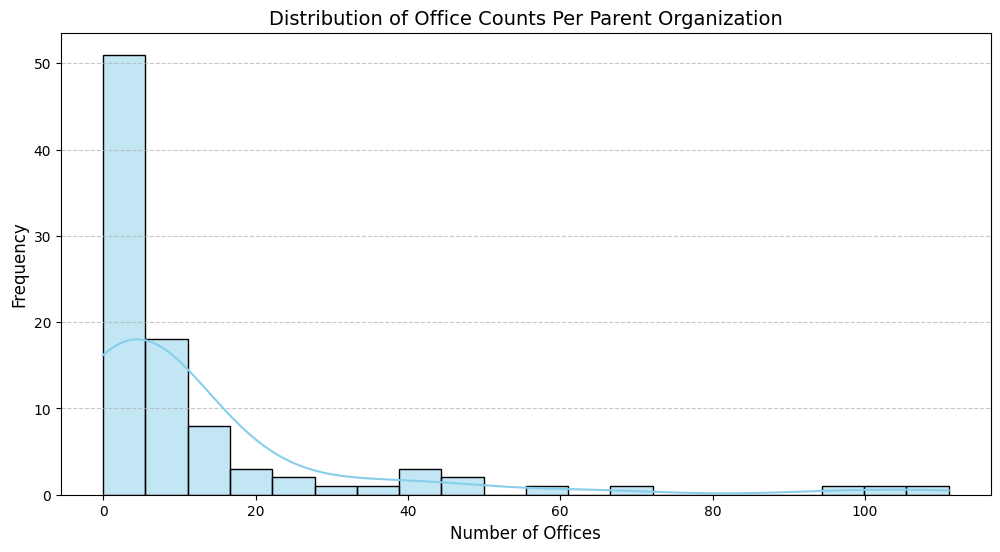

In [64]:
plt.figure(figsize=(12, 6))

# Using seaborn for a histogram distribution plot
sns.histplot(office_counts['office_count'], bins=20, kde=True, color='skyblue')

# Title and labels
plt.title('Distribution of Office Counts Per Parent Organization', fontsize=14)
plt.xlabel('Number of Offices', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

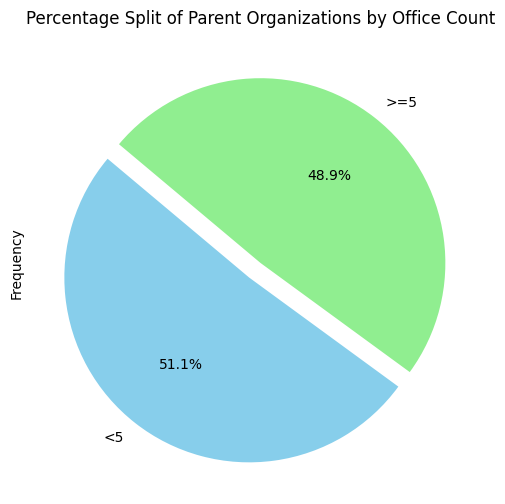

In [65]:
split_counts = office_counts['office_count'].apply(lambda x: '<5' if x < 5 else '>=5').value_counts(normalize=True) * 100

# Step 3: Plot the percentage split
import matplotlib.pyplot as plt

plt.figure(figsize=(6, 6))

# Pie chart for percentage split
split_counts.plot.pie(
    autopct='%1.1f%%',
    labels=['<5', '>=5'],
    colors=['skyblue', 'lightgreen'],
    startangle=140,
    explode=[0.1, 0],  # Emphasize one segment
)
plt.title('Percentage Split of Parent Organizations by Office Count')
plt.ylabel('Frequency')  # Remove default ylabel
plt.show()

So lets do an analysis of the % orgs in these sections have a credit subscription

In [66]:
split_counts.head(5)

office_count
>=5    51.06383
<5     48.93617
Name: proportion, dtype: float64

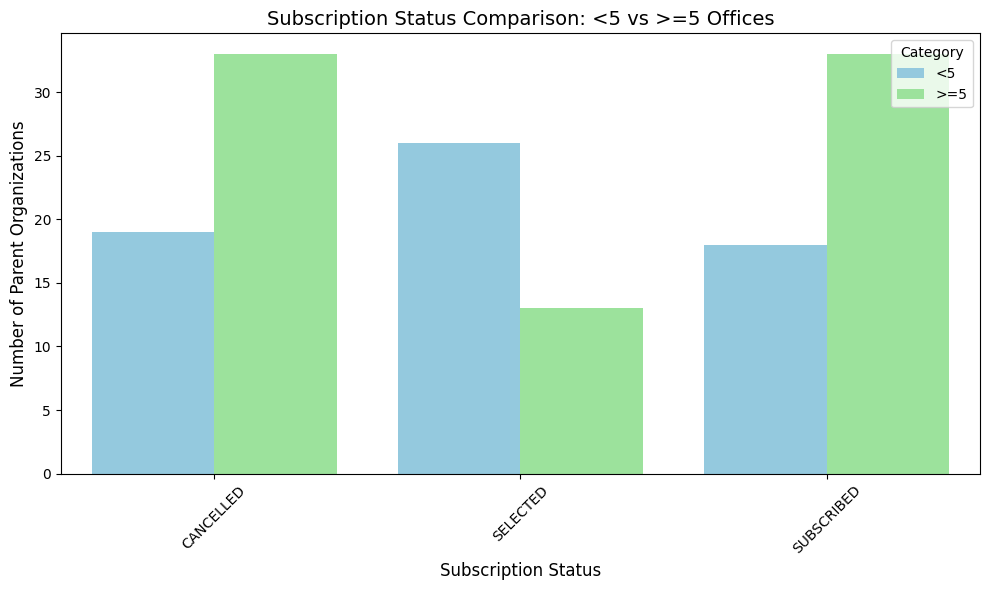

In [67]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Step 1: Count unique offices and categorize
#office_counts = merged_df.groupby('parent_org')['office_name'].nunique().reset_index(name='office_count')
office_counts['category'] = office_counts['office_count'].apply(lambda x: '<5' if x < 5 else '>=5')

# Step 2: Merge back with the merged DataFrame to include subscription status
merged_data = pd.merge(credit_ofc, office_counts[['Parent ORG', 'category']], on='Parent ORG', how='left')

# Step 3: Group by category and subscription status
status_counts = (
    merged_data.groupby(['category', 'Subcription Status'])['Parent ORG']
    .nunique()
    .reset_index(name='count')
)

# Step 4: Visualize with a grouped bar plot
plt.figure(figsize=(10, 6))
sns.barplot(
    x='Subcription Status',
    y='count',
    hue='category',
    data=status_counts,
    palette={'<5': 'skyblue', '>=5': 'lightgreen'}
)

# Customizing the plot
plt.title('Subscription Status Comparison: <5 vs >=5 Offices', fontsize=14)
plt.xlabel('Subscription Status', fontsize=12)
plt.ylabel('Number of Parent Organizations', fontsize=12)
plt.xticks(rotation=45)
plt.legend(title='Category', loc='upper right')
plt.tight_layout()

plt.show()


In [68]:
pay=pd.read_csv(r'used\Payment Collection Status Report-report-11-21-2024.csv')
pay.head(5)

,ORG Name,Billing Start Date,Billing End Date,Amount Paid,Status,Amount Due
0,eEquals,01-08-2023 15:02,31-08-2023 15:02,0.0,open,391.0
1,SolarQuote,01-08-2023 09:29,31-08-2023 09:29,0.0,open,2360.0
2,SubcontractorHub Demo,01-08-2023 14:08,31-08-2023 14:08,0.0,open,260.0
3,Suntuity,01-08-2023 09:30,31-08-2023 09:30,0.0,open,28215.0
4,NovemberTech,01-08-2023 09:29,31-08-2023 09:29,0.0,open,368.0


In [69]:
pay.shape

(926, 6)

In [70]:
print(len(pay['ORG Name'].unique().tolist()))

144


In [71]:
credit_ofc['Parent ORG']
print(len(credit_ofc['Parent ORG'].unique().tolist()))

94


In [72]:
pay.isna().sum()

ORG Name              0
Billing Start Date    0
Billing End Date      0
Amount Paid           0
Status                0
Amount Due            0
dtype: int64

In [73]:
credit_orgs = set(credit_ofc['ORG Name'])
offices_orgs = set(pay['ORG Name'])

# Find common organizations
common_orgs = credit_orgs.intersection(offices_orgs)

# Count the number of common organizations
common_count = len(common_orgs)

print(f"Number of common organizations: {common_count}")
print(f"Common organizations: {common_orgs}")

Number of common organizations: 55
Common organizations: {'Patriot Power', 'SunnyMac Solar', 'TriSMART Solar', 'M&H Home Solutions', 'Brightstar Marketing', 'ELAV8 Solar', 'US Solar', 'Inty Power', 'Independent Solar', 'Green House Solar & Air', 'Baize Electric and Solar Tech', 'Ease - Build Inc', 'Rack Solar', 'Green Light Solar', 'Poly Energy', 'RFX', 'Genesis Solar', 'eEquals', 'Solar AI', 'UES Solar', 'SubHub Trial Account', 'Kenkay Solar', 'Next Phase Electric', 'Skyline Solar LLC', 'Sky Energy', 'Demand Construction', 'NovemberTech', 'SolarQuote', 'Standard Energy Solutions', 'Integrity Solar and Home Solutions', 'Oto Pilot', 'LivSmart', 'SubcontractorHub Demo', 'Apollo Energy', 'Bright Solar', 'Dawn to Dusk Solar', 'Velasco Electric', 'Flagship Solar', 'ESD Solar', 'Suntuity', 'Castaways Energy', 'Turn Solar', 'live Orgnization', 'Spartan Solar', 'Vespa Solar', 'Solar Mite Solutions', 'PowerSol USA', 'Pulse Turnkey', 'Helio Solar', 'Senergy Power', 'National Solar Energy Corp', 

In [74]:
pay['Amount Paid'].describe()

count     926.000000
mean      345.486080
std       847.725776
min         0.000000
25%         0.000000
50%         0.000000
75%       514.500000
max      9228.000000
Name: Amount Paid, dtype: float64

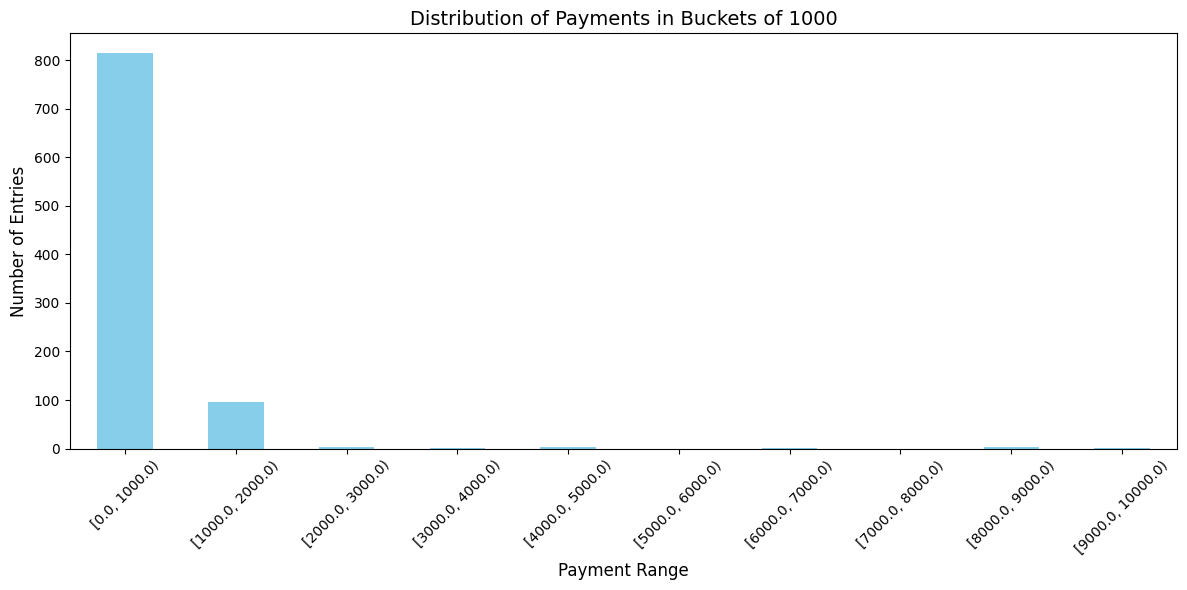

In [75]:


# Step 1: Define bins
max_payment = pay['Amount Paid'].max()
bins = np.arange(0, max_payment + 1000, 1000)  # Create bins of size 100

# Step 2: Create buckets
pay['payment_bucket'] = pd.cut(pay['Amount Paid'], bins=bins, right=False)

# Step 3: Analyze or visualize
bucket_counts = pay['payment_bucket'].value_counts().sort_index()

# Display bucket counts
#print(bucket_counts)

# Visualization
import matplotlib.pyplot as plt
bucket_counts.plot(kind='bar', figsize=(12, 6), color='skyblue')
plt.title('Distribution of Payments in Buckets of 1000', fontsize=14)
plt.xlabel('Payment Range', fontsize=12)
plt.ylabel('Number of Entries', fontsize=12)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


In [76]:
credit_ofc.head(5)

,ORG Name,Subcription Status,StripePlan Plan name,Parent ORG,Office Name,Name,State,City
0,Patriot Power,CANCELLED,Solar Per Proposal Monthly,Patriot Power,Florida Energy Advisors,Patriot Power-Florida Energy Advisors,Florida,Wellington
1,Patriot Power,CANCELLED,Solar Per Proposal Monthly,Patriot Power,OtoPilot,Patriot Power-OtoPilot,Florida,Wellington
2,SolarQuote,SUBSCRIBED,Solar Per Proposal Monthly,SolarQuote,NaN,SolarQuote-1 Click Solar,UT,Park City
3,SolarQuote,SUBSCRIBED,Solar Per Proposal Monthly,SolarQuote,NaN,SolarQuote-Evergreen,UT,Park City
4,SolarQuote,SUBSCRIBED,Solar Per Proposal Monthly,SolarQuote,PowerFi Energy,SolarQuote-PowerFi Energy,UT,Park City


In [77]:
credit_pay = pd.merge(credit_ofc, pay, 
                     left_on='ORG Name', right_on='ORG Name')

In [78]:
credit_pay.head(5)

,ORG Name,Subcription Status,StripePlan Plan name,Parent ORG,Office Name,Name,State,City,Billing Start Date,Billing End Date,Amount Paid,Status,Amount Due,payment_bucket
0,Patriot Power,CANCELLED,Solar Per Proposal Monthly,Patriot Power,Florida Energy Advisors,Patriot Power-Florida Energy Advisors,Florida,Wellington,01-08-2023 09:28,31-08-2023 09:28,46.0,paid,46.0,"[0.0, 1000.0)"
1,Patriot Power,CANCELLED,Solar Per Proposal Monthly,Patriot Power,Florida Energy Advisors,Patriot Power-Florida Energy Advisors,Florida,Wellington,30-09-2023 09:28,31-10-2023 09:28,23.0,paid,23.0,"[0.0, 1000.0)"
2,Patriot Power,CANCELLED,Solar Per Proposal Monthly,Patriot Power,Florida Energy Advisors,Patriot Power-Florida Energy Advisors,Florida,Wellington,31-08-2023 09:28,30-09-2023 09:28,69.0,paid,69.0,"[0.0, 1000.0)"
3,Patriot Power,CANCELLED,Solar Per Proposal Monthly,Patriot Power,Florida Energy Advisors,Patriot Power-Florida Energy Advisors,Florida,Wellington,31-10-2023 09:28,30-11-2023 09:28,69.0,paid,69.0,"[0.0, 1000.0)"
4,Patriot Power,CANCELLED,Solar Per Proposal Monthly,Patriot Power,Florida Energy Advisors,Patriot Power-Florida Energy Advisors,Florida,Wellington,30-11-2023 09:28,31-12-2023 09:28,207.0,paid,207.0,"[0.0, 1000.0)"


See the subscription status for the top 5 or 10 amounts. Before which save this data.

In [79]:
output_file = 'created_pay.xlsx'  # Change this to your desired file name and path
credit_pay.to_excel(output_file, index=False)  # Set index=False to avoid saving the DataFrame index as a column

print(f"DataFrame saved as {output_file}")

DataFrame saved as created_pay.xlsx


Top 10 Amounts to Subscription status

Subscription status for top 10 amount holders:
Subcription Status
CANCELLED     7
SUBSCRIBED    3
Name: count, dtype: int64


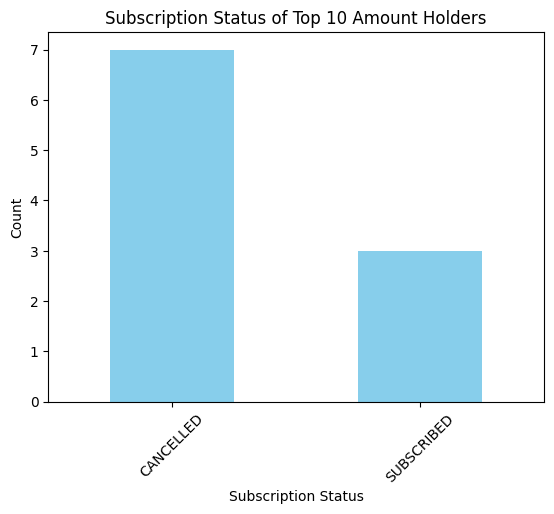

In [80]:
# Sort by amount in descending order
top_holders = credit_pay.sort_values(by='Amount Paid', ascending=False)

# Select top n holders (e.g., top 10)
n = 10
top_holders_subset = top_holders.head(n)

# Analyze subscription status of top holders
subscription_status_counts = top_holders_subset['Subcription Status'].value_counts()

print(f"Subscription status for top {n} amount holders:")
print(subscription_status_counts)

subscription_status_counts.plot(kind='bar', color='skyblue')
plt.title(f"Subscription Status of Top {n} Amount Holders")
plt.xlabel('Subscription Status')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()


Number of offices to amounts

Top organizations by amount per office:
                                    total_amount  num_offices  \
Parent ORG                                                      
Integrity Solar and Home Solutions    1615813.20            9   
Spartan Solar                         4080967.20           24   
LivSmart                              1534660.20           10   
Poly Energy                           1383582.20           20   
Helio Solar                            291293.60            5   
Vespa Solar                            840295.20           15   
Sunly Home                             514800.00           12   
Green Light Solar                     2983911.90          111   
SunnyMac Solar                        1573683.15           61   
Standard Energy Solutions              214351.20            9   

                                    amount_per_office  
Parent ORG                                             
Integrity Solar and Home Solutions      179534.800000  
Spartan Sol

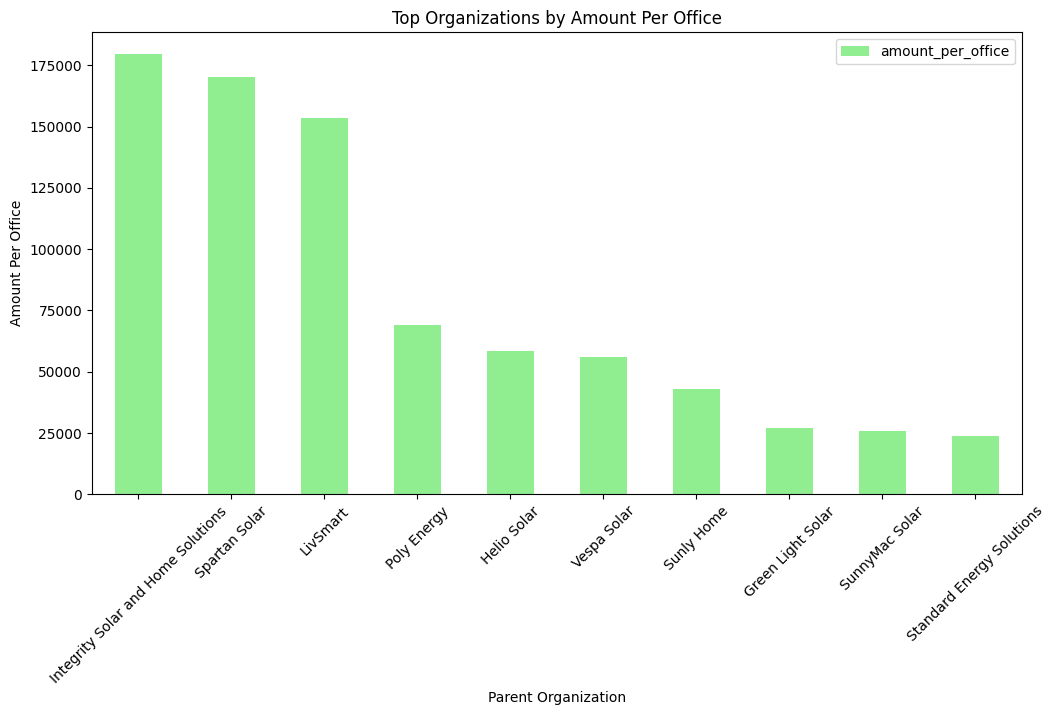

In [81]:
# Aggregate data by parent organization
grouped = credit_pay.groupby('Parent ORG').agg(
    total_amount=('Amount Paid', 'sum'),
    num_offices=('Office Name', 'nunique')  # Replace 'office_name' with your column name
)

# Calculate the amount-to-office ratio
grouped['amount_per_office'] = grouped['total_amount'] / grouped['num_offices']

# Sort by the amount-per-office ratio
top_ratios = grouped.sort_values(by='amount_per_office', ascending=False)

print("Top organizations by amount per office:")
print(top_ratios.head(10))


top_ratios.reset_index().head(10).plot(
    x='Parent ORG', y='amount_per_office', kind='bar', figsize=(12, 6), color='lightgreen'
)
plt.title('Top Organizations by Amount Per Office')
plt.xlabel('Parent Organization')
plt.ylabel('Amount Per Office')
plt.xticks(rotation=45)
plt.show()







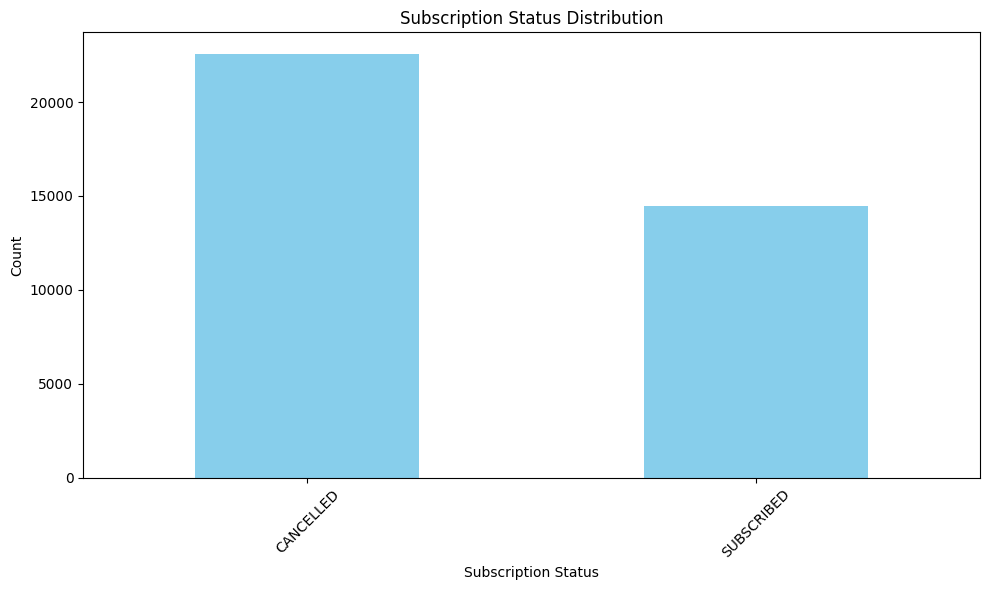

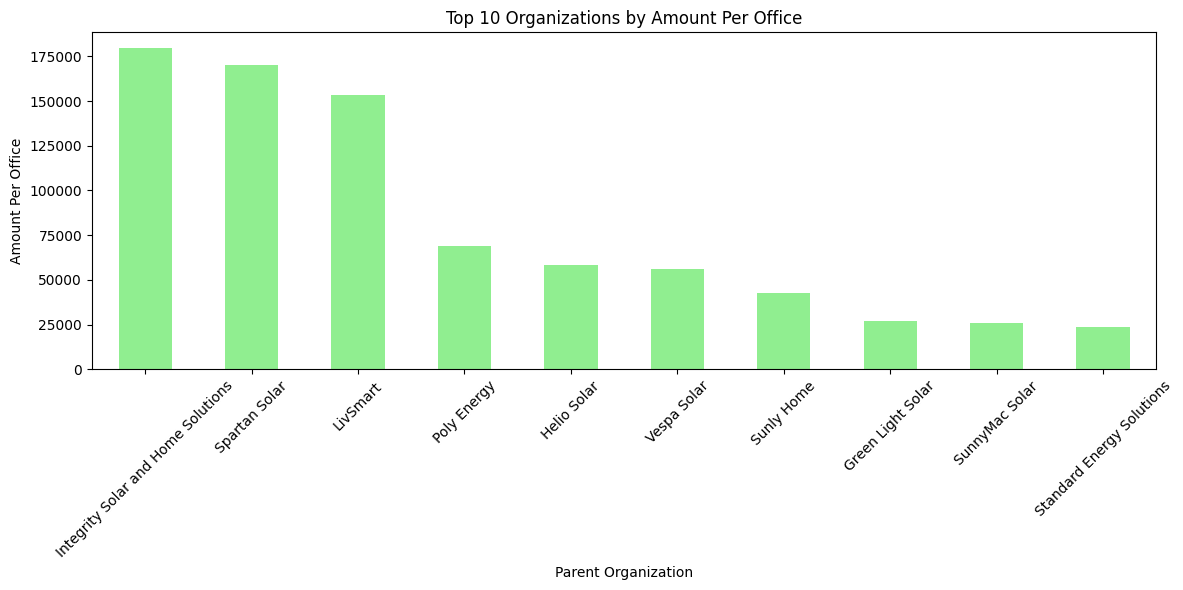

In [82]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming merged_df is your DataFrame
# Example DataFrame (replace with your actual data)
# merged_df = pd.read_csv("your_file.csv")

# Part 1: Subscription Status Distribution
subscription_status_counts = credit_pay['Subcription Status'].value_counts()

# Plot Subscription Status
plt.figure(figsize=(10, 6))
subscription_status_counts.plot(kind='bar', color='skyblue')
plt.title("Subscription Status Distribution")
plt.xlabel("Subscription Status")
plt.ylabel("Count")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Part 2: Amount Per Office Calculation
# Group by parent organization
grouped = credit_pay.groupby('Parent ORG').agg(
    total_amount=('Amount Paid', 'sum'),
    num_offices=('Office Name', 'nunique')  # Replace 'office_name' with your column
)

# Calculate the amount-to-office ratio
grouped['amount_per_office'] = grouped['total_amount'] / grouped['num_offices']

# Sort by amount_per_office
sorted_grouped = grouped.sort_values(by='amount_per_office', ascending=False)

# Top 10 organizations by amount per office
top_organizations = sorted_grouped.head(10)

# Plot Top Organizations by Amount Per Office
plt.figure(figsize=(12, 6))
top_organizations['amount_per_office'].plot(kind='bar', color='lightgreen')
plt.title("Top 10 Organizations by Amount Per Office")
plt.xlabel("Parent Organization")
plt.ylabel("Amount Per Office")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


Further Analysis

In [83]:
credit_pay.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 37037 entries, 0 to 37036
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype   
---  ------                --------------  -----   
 0   ORG Name              37037 non-null  object  
 1   Subcription Status    37037 non-null  object  
 2   StripePlan Plan name  37037 non-null  object  
 3   Parent ORG            37037 non-null  object  
 4   Office Name           36820 non-null  object  
 5   Name                  37037 non-null  object  
 6   State                 36527 non-null  object  
 7   City                  36527 non-null  object  
 8   Billing Start Date    37037 non-null  object  
 9   Billing End Date      37037 non-null  object  
 10  Amount Paid           37037 non-null  float64 
 11  Status                37037 non-null  object  
 12  Amount Due            37037 non-null  float64 
 13  payment_bucket        37037 non-null  category
dtypes: category(1), float64(2), object(11)
memory usage: 3

Treating the date columns for heatmap analysis

In [84]:
credit_pay['Billing Start Date'] = pd.to_datetime(credit_pay['Billing Start Date'],format="%d-%m-%Y %H:%M")
    # Extract useful features from the date
credit_pay['start_year'] = credit_pay['Billing Start Date'].dt.year
credit_pay['start_month'] = credit_pay['Billing Start Date'].dt.month
credit_pay['start_day'] = credit_pay['Billing Start Date'].dt.day
credit_pay['start_day_of_week'] = credit_pay['Billing Start Date'].dt.dayofweek
    # Drop the original date column
credit_pay = credit_pay.drop(columns=['Billing Start Date'])


In [85]:
credit_pay['Billing End Date'] = pd.to_datetime(credit_pay['Billing End Date'],format="%d-%m-%Y %H:%M")
    # Extract useful features from the date
credit_pay['end_year'] = credit_pay['Billing End Date'].dt.year
credit_pay['end_month'] = credit_pay['Billing End Date'].dt.month
credit_pay['end_day'] = credit_pay['Billing End Date'].dt.day
credit_pay['end_day_of_week'] = credit_pay['Billing End Date'].dt.dayofweek
    # Drop the original date column
credit_pay = credit_pay.drop(columns=['Billing End Date'])

Using label encoders on copy of the dataframe for the heatmap

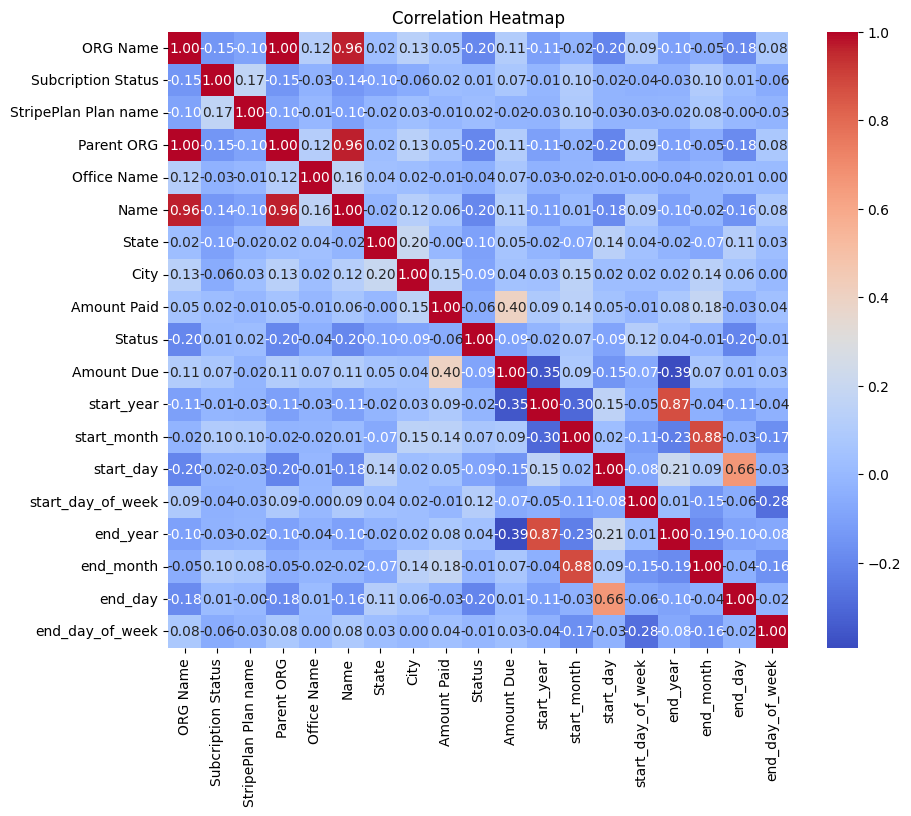

In [87]:
from sklearn.preprocessing import LabelEncoder
# Step 1: Convert object columns to numeric
df_encoded = credit_pay.copy()
#drop the payment bucket its intervals type not needed here
df_encoded = df_encoded.drop(columns=['payment_bucket'])
label_encoders = {}

for col in df_encoded.select_dtypes(include=['object']).columns:
    le = LabelEncoder()
    df_encoded[col] = le.fit_transform(df_encoded[col].astype(str))
    label_encoders[col] = le  # Store the encoder for reverse mapping if needed

# Step 2: Calculate correlation matrix
correlation_matrix = df_encoded.corr()

# Step 3: Plot the heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", cbar=True)
plt.title("Correlation Heatmap")
plt.show()

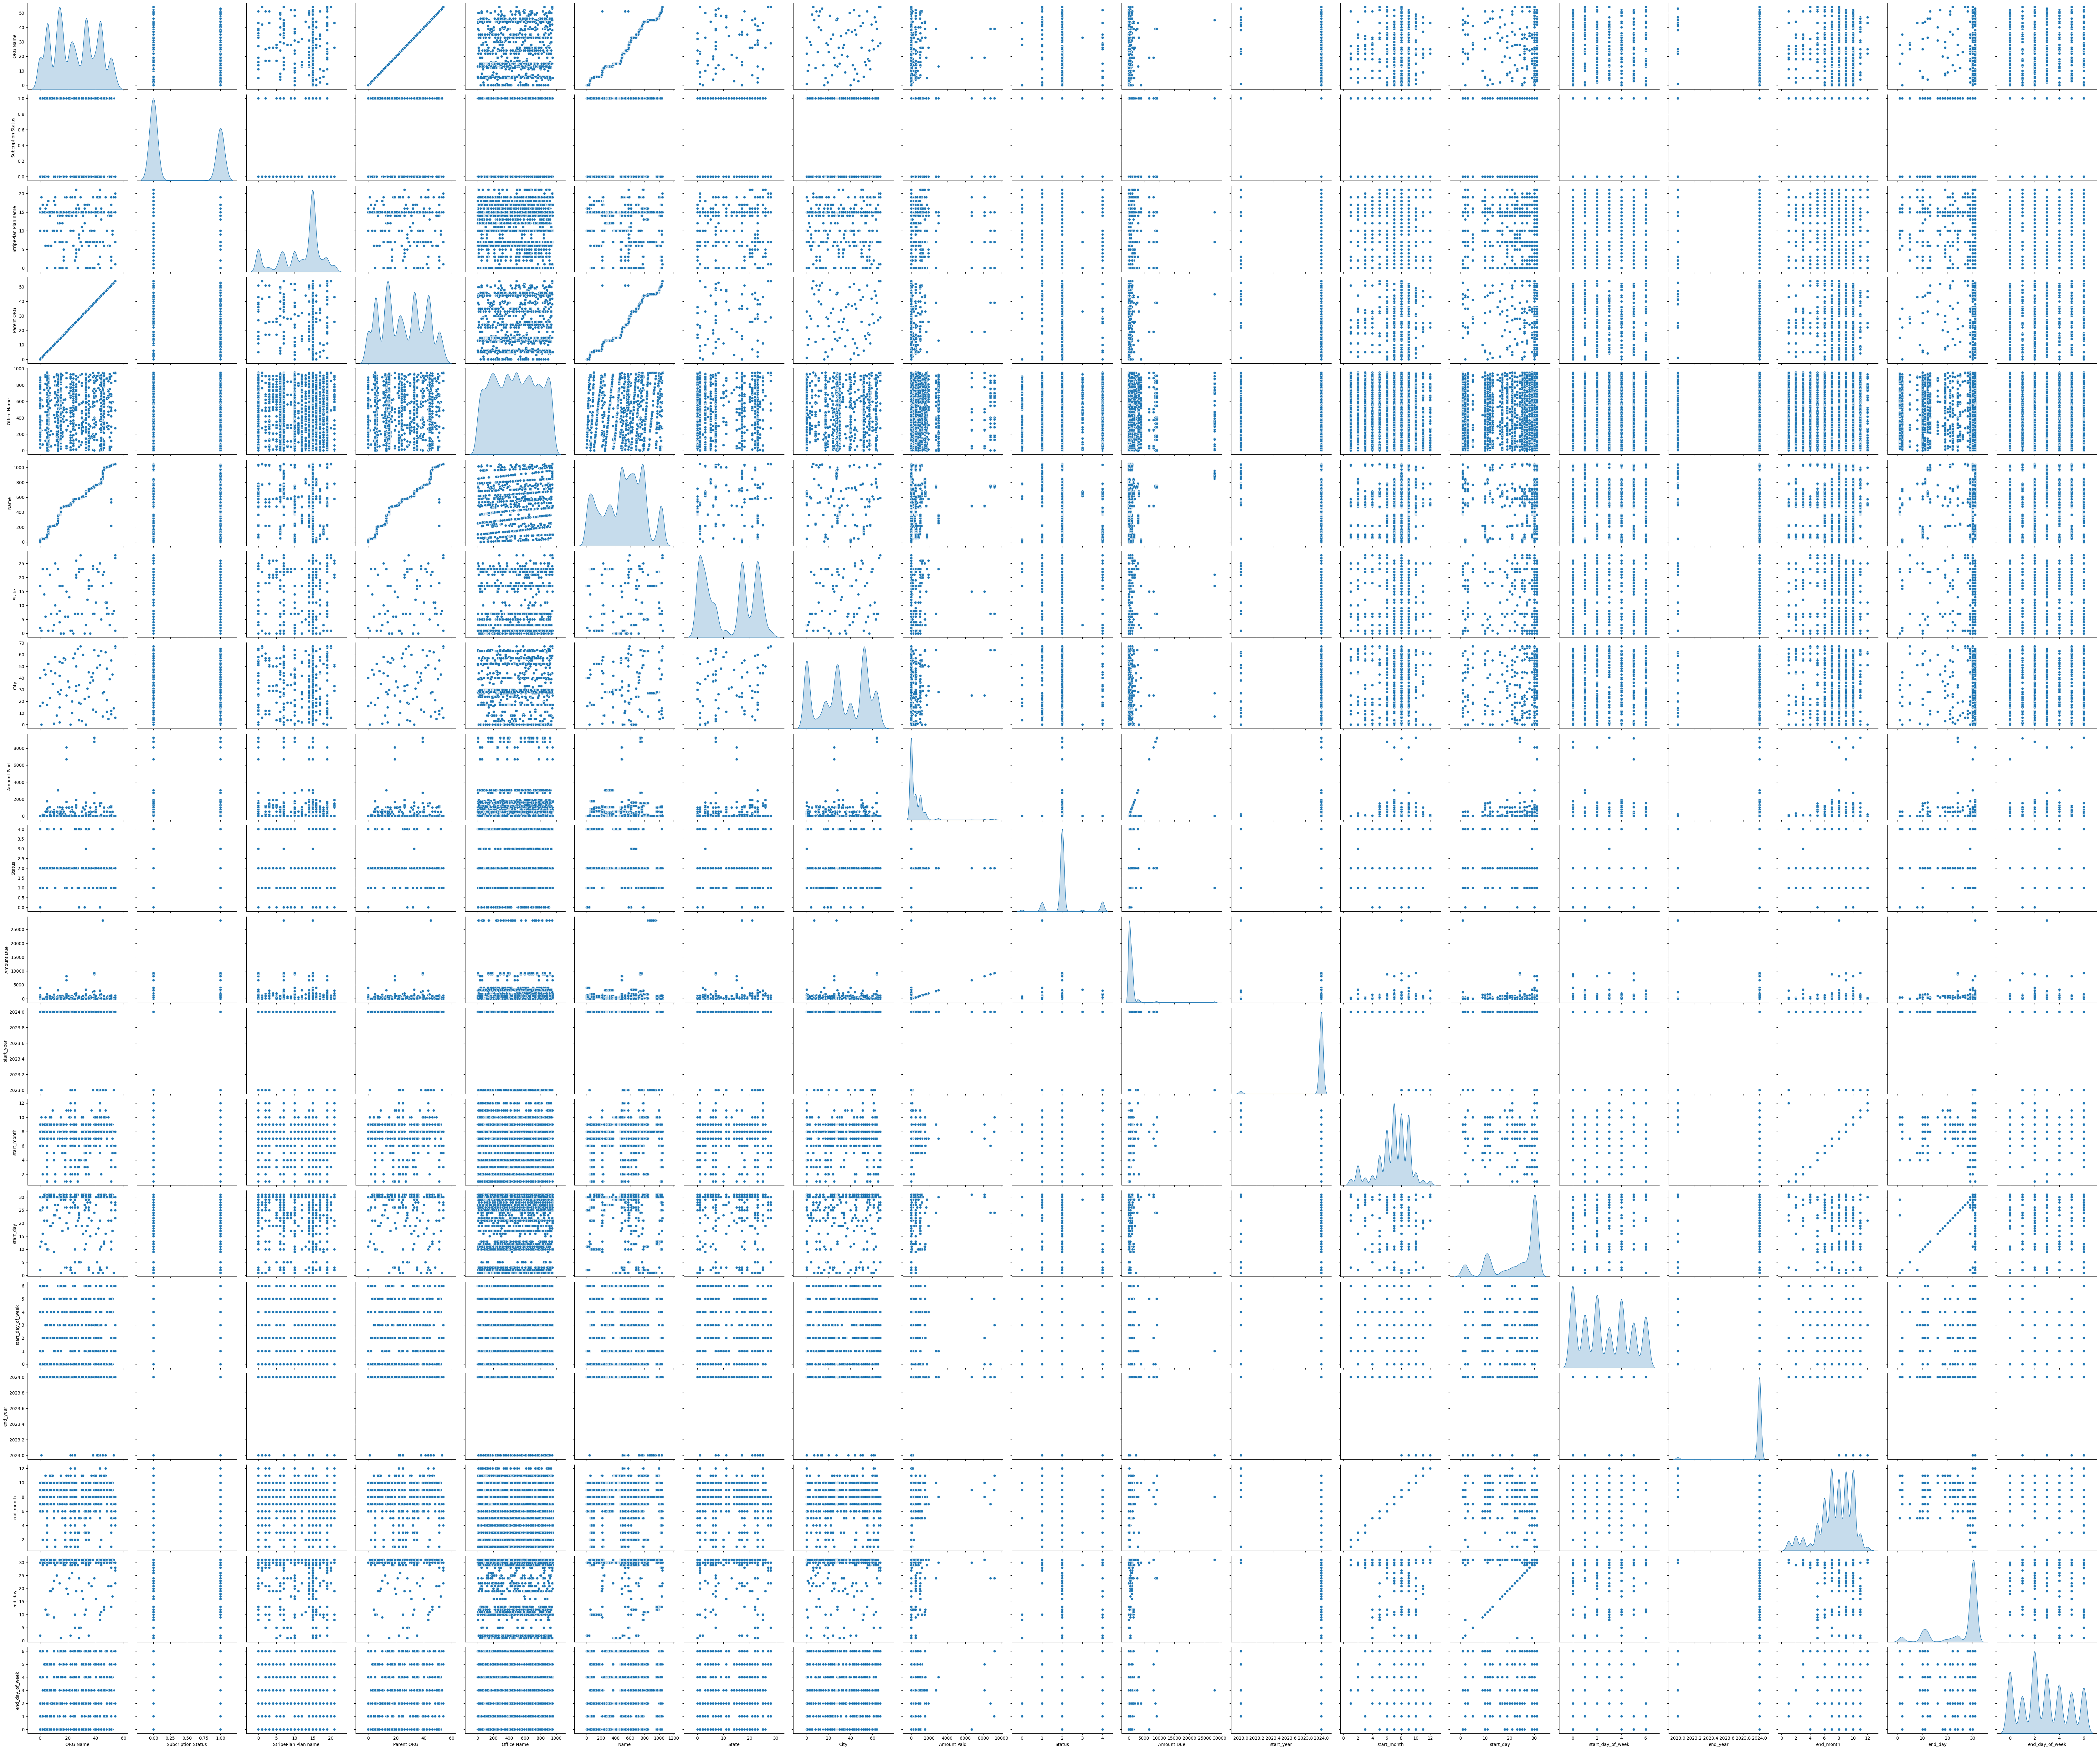

In [90]:
numeric_df = df_encoded.select_dtypes(include=["number", "datetime64"])
sns.pairplot(numeric_df, diag_kind="kde", height=3, aspect=1.2)  # 'hue' for color differentiation
plt.show()

In [91]:
columns = numeric_df.columns.tolist()

# Generate all possible combinations of 4x4 subplots
step = 4  # Number of variables per sub-grid
for i in range(0, len(columns), step):
    subset = columns[i:i + step]  # Select subset of columns
    if len(subset) > 1:  # At least two columns needed for pairplot
        pairplot = sns.pairplot(numeric_df[subset], diag_kind="kde", height=3)
        pairplot.fig.suptitle(f"Pairplot: {', '.join(subset)}", y=1.02)  # Add a title
        file_name = f"pairplot_{i//step + 1}.png"
        pairplot.savefig(file_name)  # Save each plot as an image
        plt.close(pairplot.fig)  # Close the figure to save memory

In [95]:
from docx import Document
from docx.shared import Inches

# Create a Word document
doc = Document()
doc.add_heading("Pairwise Plots", level=1)

# Add each saved plot to the document
for i in range(0, len(columns), step):
    file_name = f"pairplot_{i//step + 1}.png"
    doc.add_heading(f"Pairplot {i//step + 1}", level=2)
    doc.add_picture(file_name, width=Inches(6))  # Adjust size as needed

# Save the document
doc.save("pairwise_plots.docx")
